Q1: K-Means vs Hierarchical
K-Means is a partitional clustering algorithm that requires the number of clusters
k
k in advance and iteratively assigns points to the nearest centroid, which works best for large datasets with roughly spherical, similar‑size clusters. Hierarchical clustering builds a tree (dendrogram) of clusters without needing a preset
k
k, and can reveal nested structure but is more computationally expensive.​

K-Means use case: Customer segmentation on a large e‑commerce dataset where the goal is to quickly partition customers into a fixed number of behavioral groups.​

Hierarchical use case: Document clustering in a small research corpus where an interpretable hierarchy of topics and sub‑topics is useful.​

Q2: Silhouette Score purpose
The Silhouette Score measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation), with values ranging from
−
1
−1 to
+
1
+1 where higher values indicate better clustering. It is used as an internal validation metric to compare different clustering configurations (for example, different numbers of clusters in K-Means) and select the one that yields compact, well‑separated clusters.​

Q3: Core parameters of DBSCAN
DBSCAN has two core parameters: eps (epsilon), the maximum neighborhood radius around a point, and min_samples (or MinPts), the minimum number of points required within that radius to form a dense region. A larger eps merges more points into clusters and can cause distinct groups to blend, while increasing min_samples demands denser regions to be considered clusters and typically increases the amount of noise.​

Q4: Importance of feature scaling
Clustering algorithms like K-Means and DBSCAN rely on distance calculations, so features with larger numeric ranges can dominate the distance and distort the cluster structure if data are not scaled. Applying techniques such as standardization or normalization puts all features on a comparable scale, allowing the algorithm to treat them more fairly and to detect clusters driven by genuine patterns rather than raw magnitude differences.​

Q5: Elbow Method in K-Means
The Elbow Method plots the K-Means objective (typically within‑cluster sum of squares or inertia) against different values of
k
k and looks for a point where the rate of decrease sharply changes, forming an “elbow.” This elbow indicates a reasonable trade‑off between model complexity and cluster compactness and is chosen as the approximate optimal number of clusters.​



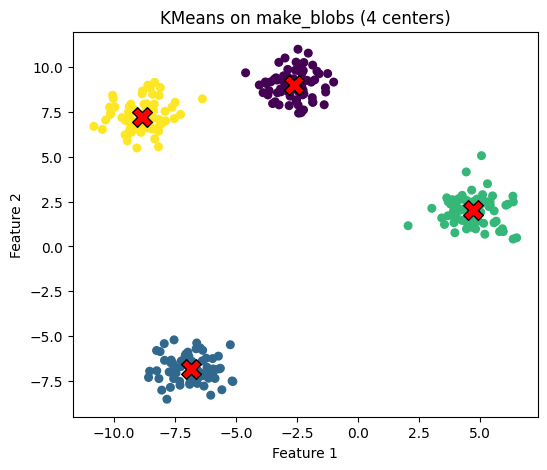

In [1]:
#Q6: KMeans on make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Generate synthetic data
X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

# 2. Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize clusters and centers
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1],
            c="red", s=200, marker="X", edgecolors="black")
plt.title("KMeans on make_blobs (4 centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:
#Q7: DBSCAN on Wine dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load data
wine = load_wine()
X = wine.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN (tune eps/min_samples as needed)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Count clusters (excluding noise label -1)
unique_labels = set(labels)
n_clusters = len([lab for lab in unique_labels if lab != -1])

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


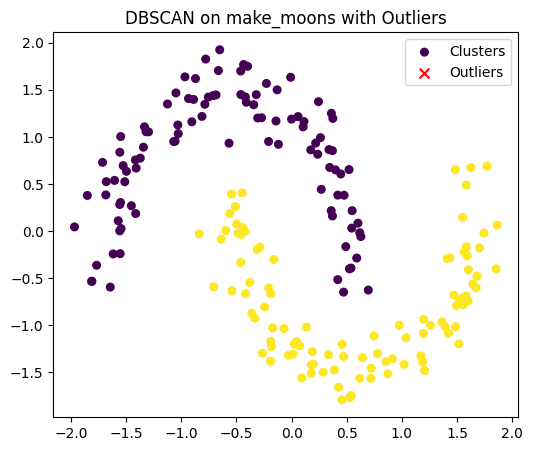

In [3]:
#Q8: DBSCAN on make_moons with outliers
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate moon-shaped data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Scale features (often helps DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply DBSCAN (tune eps/min_samples)
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Identify outliers (label = -1)
outliers = labels == -1
inliers = labels != -1

# 5. Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[inliers, 0], X_scaled[inliers, 1],
            c=labels[inliers], cmap="viridis", s=30, label="Clusters")
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c="red", s=50, marker="x", label="Outliers")
plt.title("DBSCAN on make_moons with Outliers")
plt.legend()
plt.show()


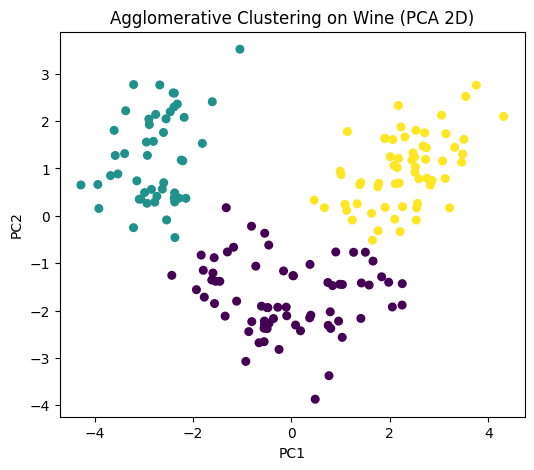

In [4]:
#Q9: PCA + Agglomerative on Wine
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Load and scale data
wine = load_wine()
X = wine.data
X_scaled = StandardScaler().fit_transform(X)

# 2. Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3. Agglomerative clustering in 2D space
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X_pca)

# 4. Visualize
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, cmap="viridis", s=30)
plt.title("Agglomerative Clustering on Wine (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Q10: E-commerce customer segmentation workflow
Choice of algorithms
Start with K-Means to obtain fast, interpretable customer segments when expecting roughly compact groups, and try several values of
k
k.​

Complement with DBSCAN or Hierarchical Clustering if expecting irregular shapes, sub‑segments, or outliers such as unusually high‑value customers.​

Data preprocessing
Handle missing values by imputing numeric features (for example, median or mean for income, spending, or frequency) and using suitable strategies for categorical demographics (such as mode imputation).​

Encode categorical variables (for example, one‑hot encoding for region or gender), then scale all numeric features using StandardScaler or MinMaxScaler so that no single variable dominates distance calculations.​

Determining number of clusters
Use the Elbow Method and Silhouette Score curves for K-Means to choose a cluster count that balances compactness and separation.​

Optionally inspect hierarchical dendrograms or cluster‑validity indices to cross‑check the chosen number of clusters and refine segmentation.​

Marketing team benefits
The resulting clusters can reveal distinct customer groups such as bargain hunters, loyal high‑value customers, occasional buyers, and category‑specialist shoppers, enabling targeted promotions and personalized recommendations.​

This segmentation helps optimize marketing spend, improve retention (for example, special offers for at‑risk segments), design differentiated campaigns, and feed downstream systems like recommendation engines and churn models